In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob


In [18]:
# Load all CSV files and assign group labels
data_files = ['csv_files/als1.csv', 'csv_files/control1.csv', 'csv_files/hunt1.csv', 'csv_files/park1.csv']
data_list = []

for file in data_files:
    df = pd.read_csv(file)
    group = file.split("/")[-1].split("1")[0]  # Extract group name (als, control, hunt, park)
    if group == 'control':
        group = 'healthy'
    if group == 'hunt':
        group = 'huntington'
    if group == 'park':
        group = 'parkinsons'
    df["Group"] = group
    data_list.append(df)

# Combine all data
data = pd.concat(data_list, ignore_index=True)

average_speed = {
    "healthy": 1.33,      # Example speed in meters per second
    "als": 1.302,
    "huntington": 1.68,
    "parkinsons": 0.98
}

# Multiply each row's elapsed time by the corresponding group's average speed
data["Estimated_Distance"] = data["Elapsed_Time"] * data["Group"].map(average_speed)

0        29.060640
1        30.783577
2        32.480603
3        34.325017
4        35.935200
           ...    
1003    288.159200
1004    289.273166
1005    290.331566
1006    291.419366
1007    292.530000
Name: Estimated_Distance, Length: 1008, dtype: float64

In [4]:
data.columns

Index(['Elapsed_Time', 'Left_Stride_Interval', 'Right_Stride_Interval',
       'Left_Swing_Interval', 'Right_Swing_Interval',
       'Left_Swing_Interval_Percent', 'Right_Swing_Interval_Percent',
       'Left_Stance_Interval', 'Right_Stance_Interval',
       'Left_Stance_Interval_Percent', 'Right_Stance_Interval_Percent',
       'Double_Support_Interval_Sec', 'Double_Support_Interval_Percent',
       'Group'],
      dtype='object')

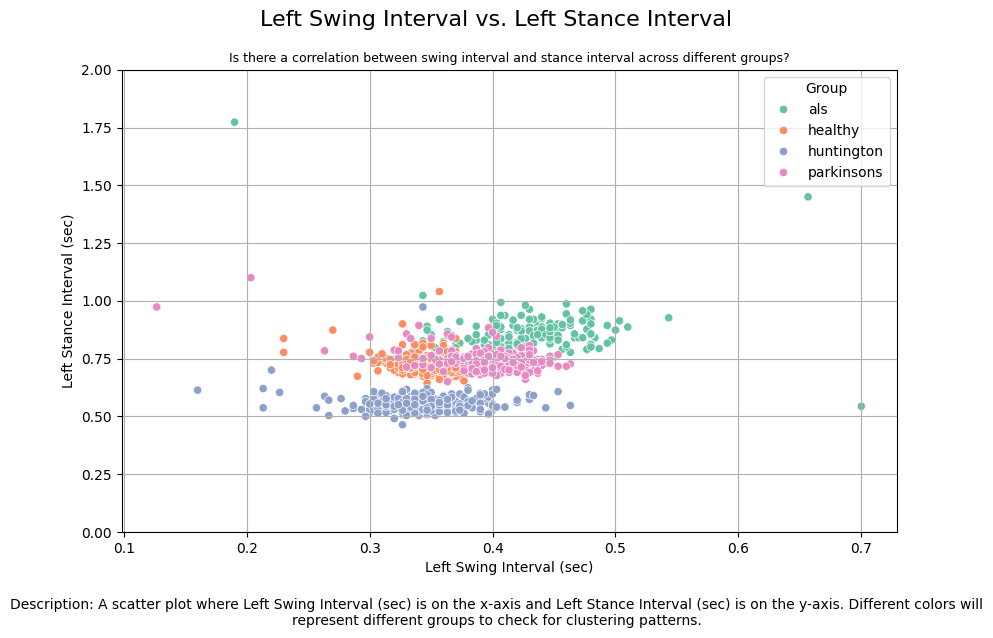

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Left_Swing_Interval', y='Left_Stance_Interval', hue='Group', data=data, palette='Set2')
plt.suptitle('Left Swing Interval vs. Left Stance Interval', fontsize=16)
plt.title('Is there a correlation between swing interval and stance interval across different groups?', fontsize=9)
plt.xlabel('Left Swing Interval (sec)')
plt.ylabel('Left Stance Interval (sec)')
plt.legend(title='Group')
plt.figtext(0.5, 0, 'Description: A scatter plot where Left Swing Interval (sec) is on the x-axis and Left Stance Interval (sec) is on the y-axis. Different colors will represent different groups to check for clustering patterns.', 
            ha='center', va='top', fontsize=10, wrap=True)
plt.grid()
plt.ylim(0, 2)
plt.show()

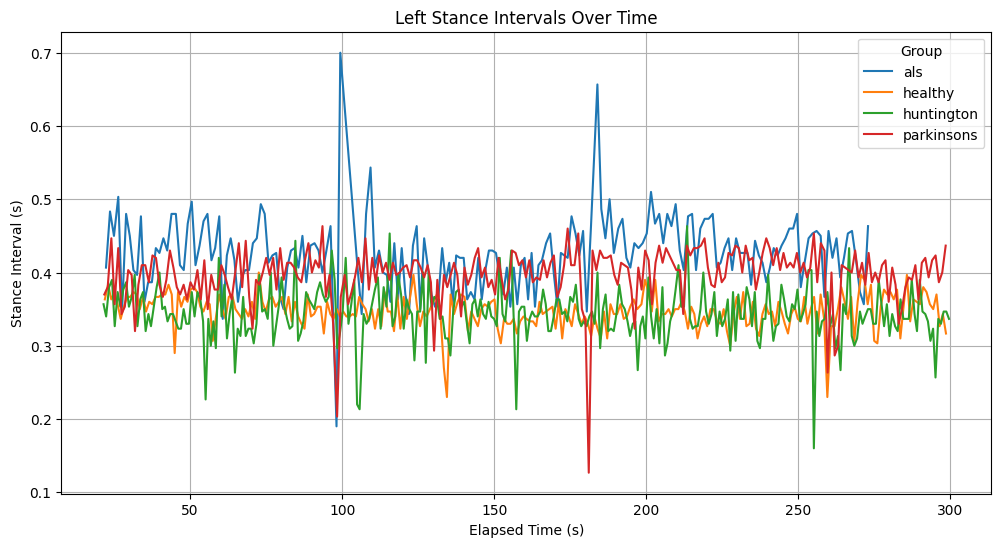

In [6]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=data, x="Elapsed_Time", y="Left_Swing_Interval", hue="Group")

plt.xlabel("Elapsed Time (s)")
plt.ylabel("Stance Interval (s)")
plt.title("Left Stance Intervals Over Time")
plt.legend(title="Group")
plt.grid(True)
plt.show()

/var/folders/lj/5gvcfpcj0sz1q841pw7jmk5m0000gn/T/ipykernel_64206/1885935788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Group", y="Estimated_Distance", palette="Set2")


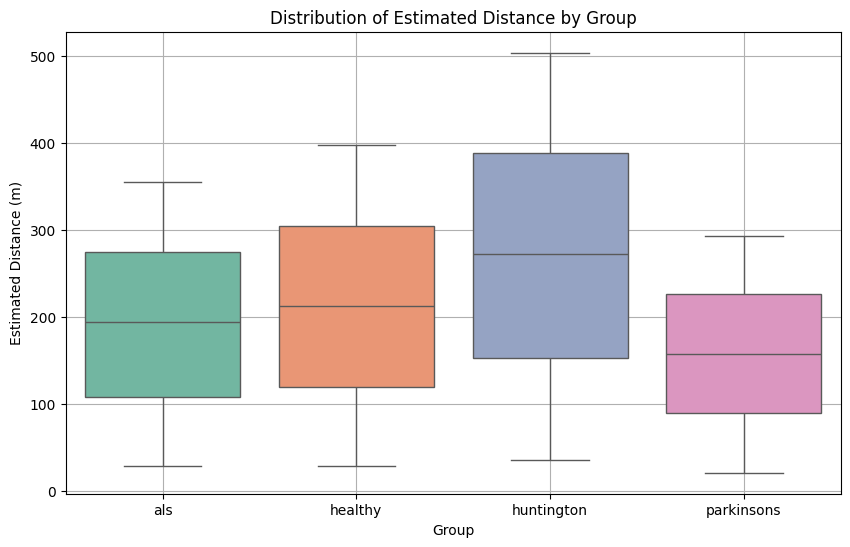

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Group", y="Estimated_Distance", palette="Set2")
plt.xlabel("Group")
plt.ylabel("Estimated Distance (m)")
plt.title("Distribution of Estimated Distance by Group")
plt.grid(True)
plt.show()
